# Simple LSTM examples

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Lecture 6

See https://machine-learning-for-physicists.org and the current course website linked there!

This notebook shows how to:
- train a recurrent (LSTM) network


In [1]:
# Import keras library. Also import some of the layers, so we do not need to
# write things like "layers.Dense", but can just write "Dense" instead
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Import the numpy library for matrix manipulations etc.
from numpy import *

# Set up the graphics by importing the matplotlib plotting library
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display



# Recall-Net

A net that can recall a number (that it has been told before), when asked to do so!

In [2]:
def init_memory_net():
    global rnn, timesteps
    rnn = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    rnn.add(LSTM(5, batch_input_shape=(None, timesteps, 3), return_sequences=True))
    rnn.add(LSTM(2, return_sequences=True))
    rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [3]:
def produce_batch():
    global batchsize, timesteps
    
    observations=zeros([batchsize,timesteps,3])
    desired_output=zeros([batchsize,timesteps,2])
    
    tell_position=random.randint(int(timesteps/2),size=batchsize)
    ask_position=int(timesteps/2)+1+random.randint(int(timesteps/2)-1,size=batchsize)
    
    # mark input-slot 0 with 1 at the tell_position:
    observations[range(batchsize),tell_position,0]=1
    # write the value to be memorized into input-slot 1
    memorize_numbers=random.random(batchsize)
    observations[range(batchsize),tell_position,1]=memorize_numbers
    # mark input-slot 2 with 1 at the ask_position
    observations[range(batchsize),ask_position,2]=1
    
    desired_output[range(batchsize),ask_position,0]=memorize_numbers
    return(observations,desired_output)

In [4]:
timesteps=20


init_memory_net()

batchsize=1
test_observations,test_target=produce_batch()

batchsize=20
epochs=300

test_output=zeros([timesteps,epochs])

for k in range(epochs):
    input_observations,output_targets=produce_batch()
    rnn.train_on_batch(input_observations,output_targets)
    test_output[:,k]=rnn.predict_on_batch(test_observations)[0,:,0]
    print("epoch: ", k, " deviation: ", "{:1.3f}".format(sum((test_output[:,k]-test_target[0,:,0])**2)), end="      \r")


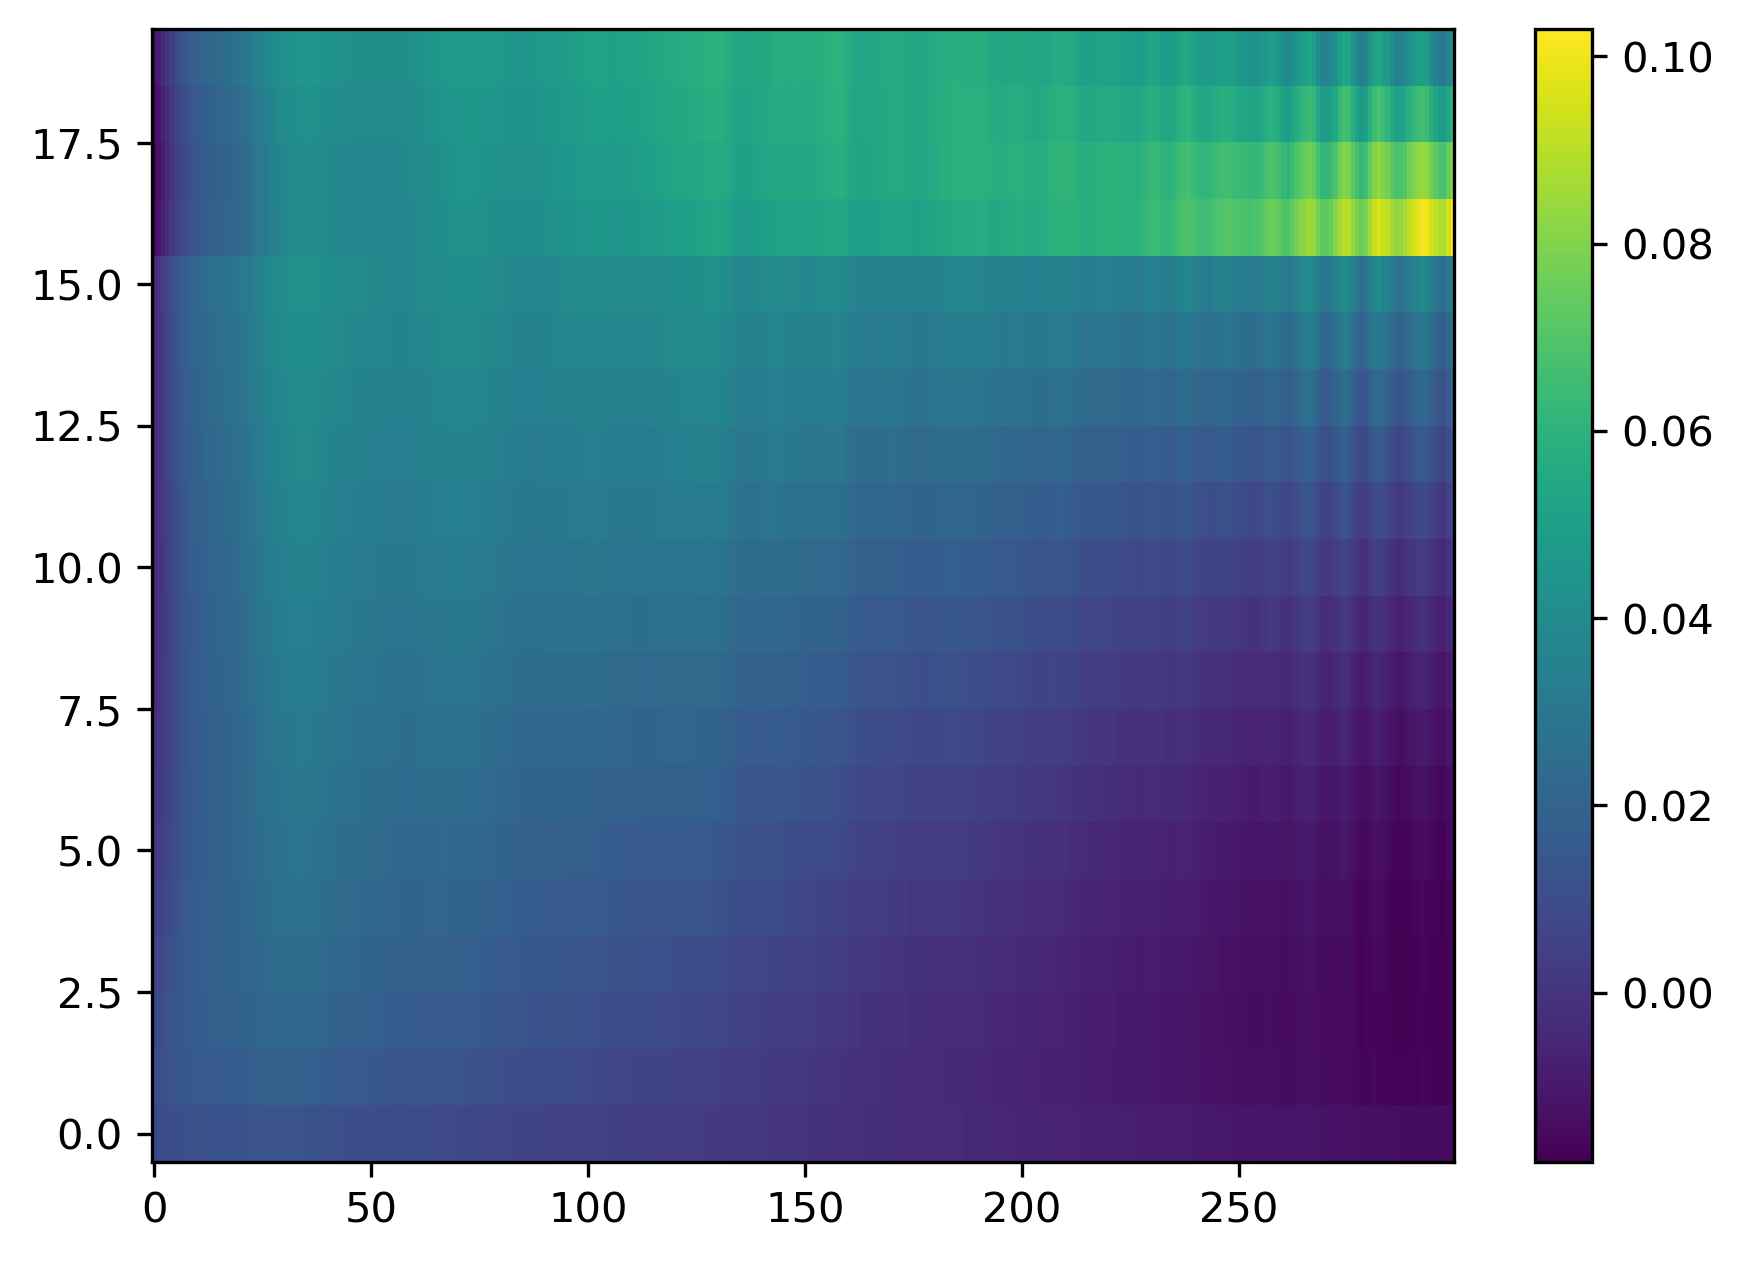

In [5]:
fig=plt.figure(figsize=(7,5))
plt.imshow(test_output,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

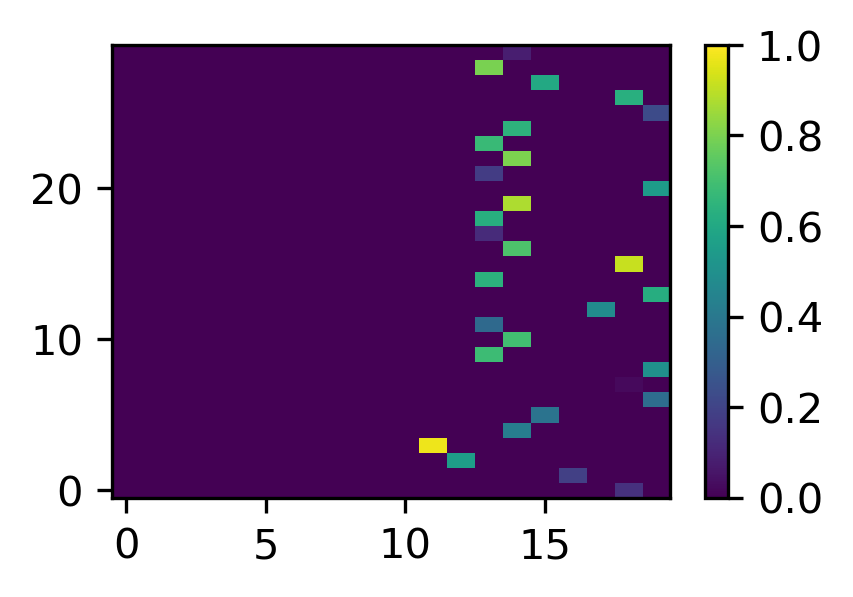

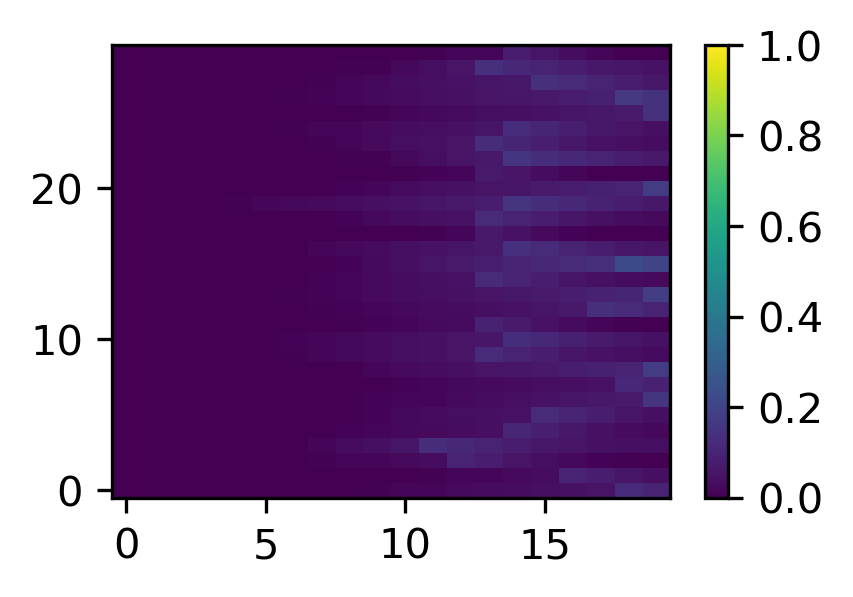

Deviation:  7.215989958227147


In [6]:
batchsize=30
test_observations,test_target=produce_batch()
test_output=zeros([batchsize,timesteps])

test_output[:,:]=rnn.predict_on_batch(test_observations)[:,:,0]

fig=plt.figure(figsize=(3,2))
plt.imshow(test_target[:,:,0],vmax=1.0,vmin=0.0,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

fig=plt.figure(figsize=(3,2))
plt.imshow(test_output,vmax=1.0,vmin=0.0,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

print("Deviation: ", sum((test_output-test_target[:,:,0])**2))

In [7]:
def produce_batch_tell_ask_twice():
    global batchsize, timesteps
    
    observations=zeros([batchsize,timesteps,3])
    desired_output=zeros([batchsize,timesteps,2])
    
    tell_position=random.randint(int(timesteps/2),size=batchsize)
    ask_position=int(timesteps/2)+1+random.randint(int(timesteps/4)-2,size=batchsize)
    ask_position2=ask_position+1+random.randint(int(timesteps/4)-2,size=batchsize)
    
    # mark input-slot 0 with 1 at the tell_position:
    observations[range(batchsize),tell_position,0]=1
    # write the value to be memorized into input-slot 1
    memorize_numbers=random.random(batchsize)
    observations[range(batchsize),tell_position,1]=memorize_numbers
    # mark input-slot 2 with 1 at the ask_position
    observations[range(batchsize),ask_position,2]=1
    observations[range(batchsize),ask_position2,2]=1
    
    desired_output[range(batchsize),ask_position,0]=memorize_numbers
    desired_output[range(batchsize),ask_position2,0]=memorize_numbers
    return(observations,desired_output)

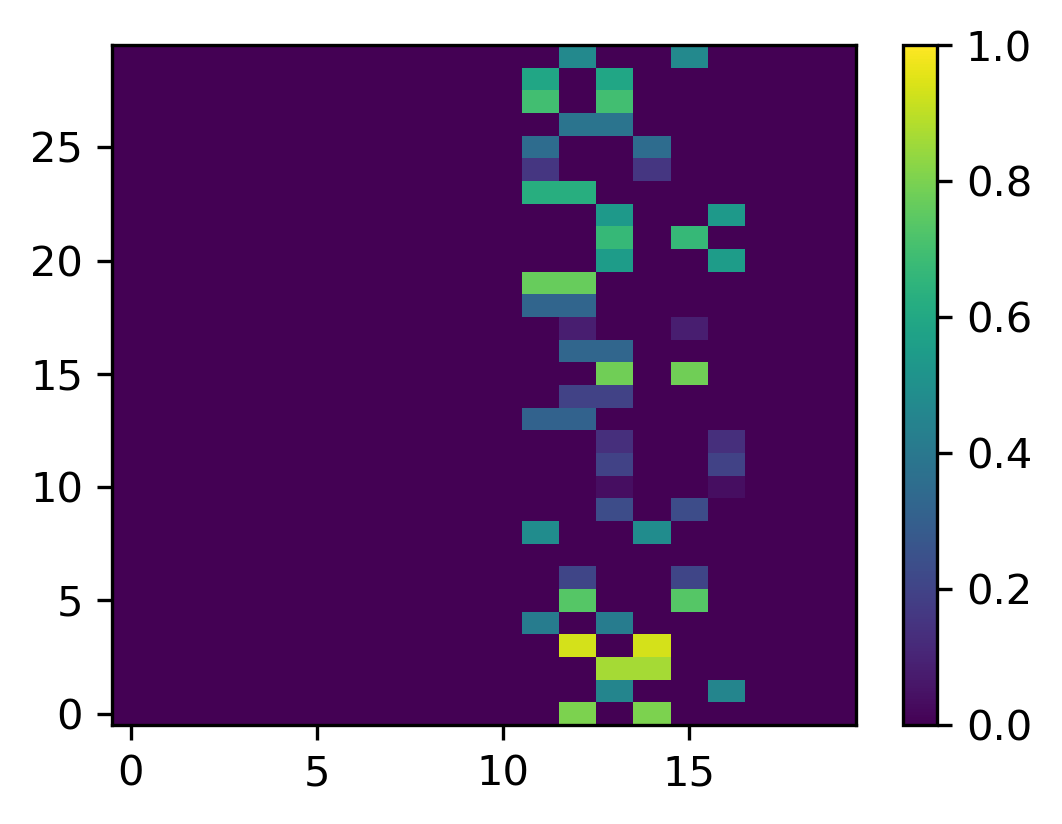

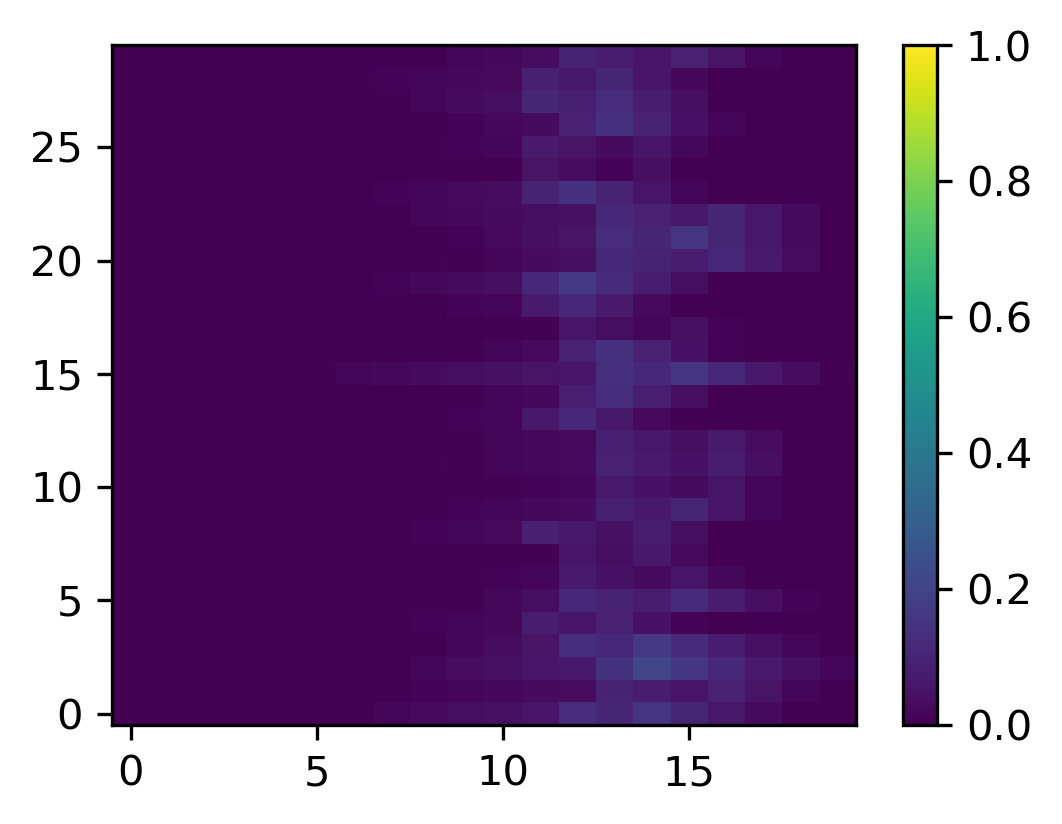

Deviation:  10.973563999218548


In [8]:
batchsize=30
test_observations,test_target=produce_batch_tell_ask_twice()
test_output=zeros([batchsize,timesteps])

test_output[:,:]=rnn.predict_on_batch(test_observations)[:,:,0]

fig=plt.figure(figsize=(4,3))
plt.imshow(test_target[:,:,0],vmax=1.0,vmin=0.0,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

fig=plt.figure(figsize=(4,3))
plt.imshow(test_output,vmax=1.0,vmin=0.0,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

print("Deviation: ", sum((test_output-test_target[:,:,0])**2))

In [9]:
def init_memory_net_powerful():
    global rnn, batchsize, timesteps
    rnn = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    rnn.add(LSTM(20, batch_input_shape=(None, timesteps, 3), return_sequences=True))
    rnn.add(LSTM(2, return_sequences=True))
    rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [10]:
init_memory_net_powerful()

timesteps=20

batchsize=1
test_observations,test_target=produce_batch()

batchsize=20
epochs=300

test_output=zeros([timesteps,epochs])

for k in range(epochs):
    input_observations,output_targets=produce_batch()
    rnn.train_on_batch(input_observations,output_targets)
    test_output[:,k]=rnn.predict_on_batch(test_observations)[0,:,0]
    print("\r epoch: ", k, " deviation: ", sum((test_output[:,k]-test_target[0,:,0])**2), end="")


 epoch:  299  deviation:  0.0068424181363528774  deviation:  0.16592467851691572 40  deviation:  0.16511782672873082 0.15493376570455564 82  deviation:  0.14569185478055857 87  deviation:  0.14337794737608056 93  deviation:  0.13754741701626794 131  deviation:  0.11686500192337908 232  deviation:  0.0035518794178908426 deviation:  0.01188384961785464

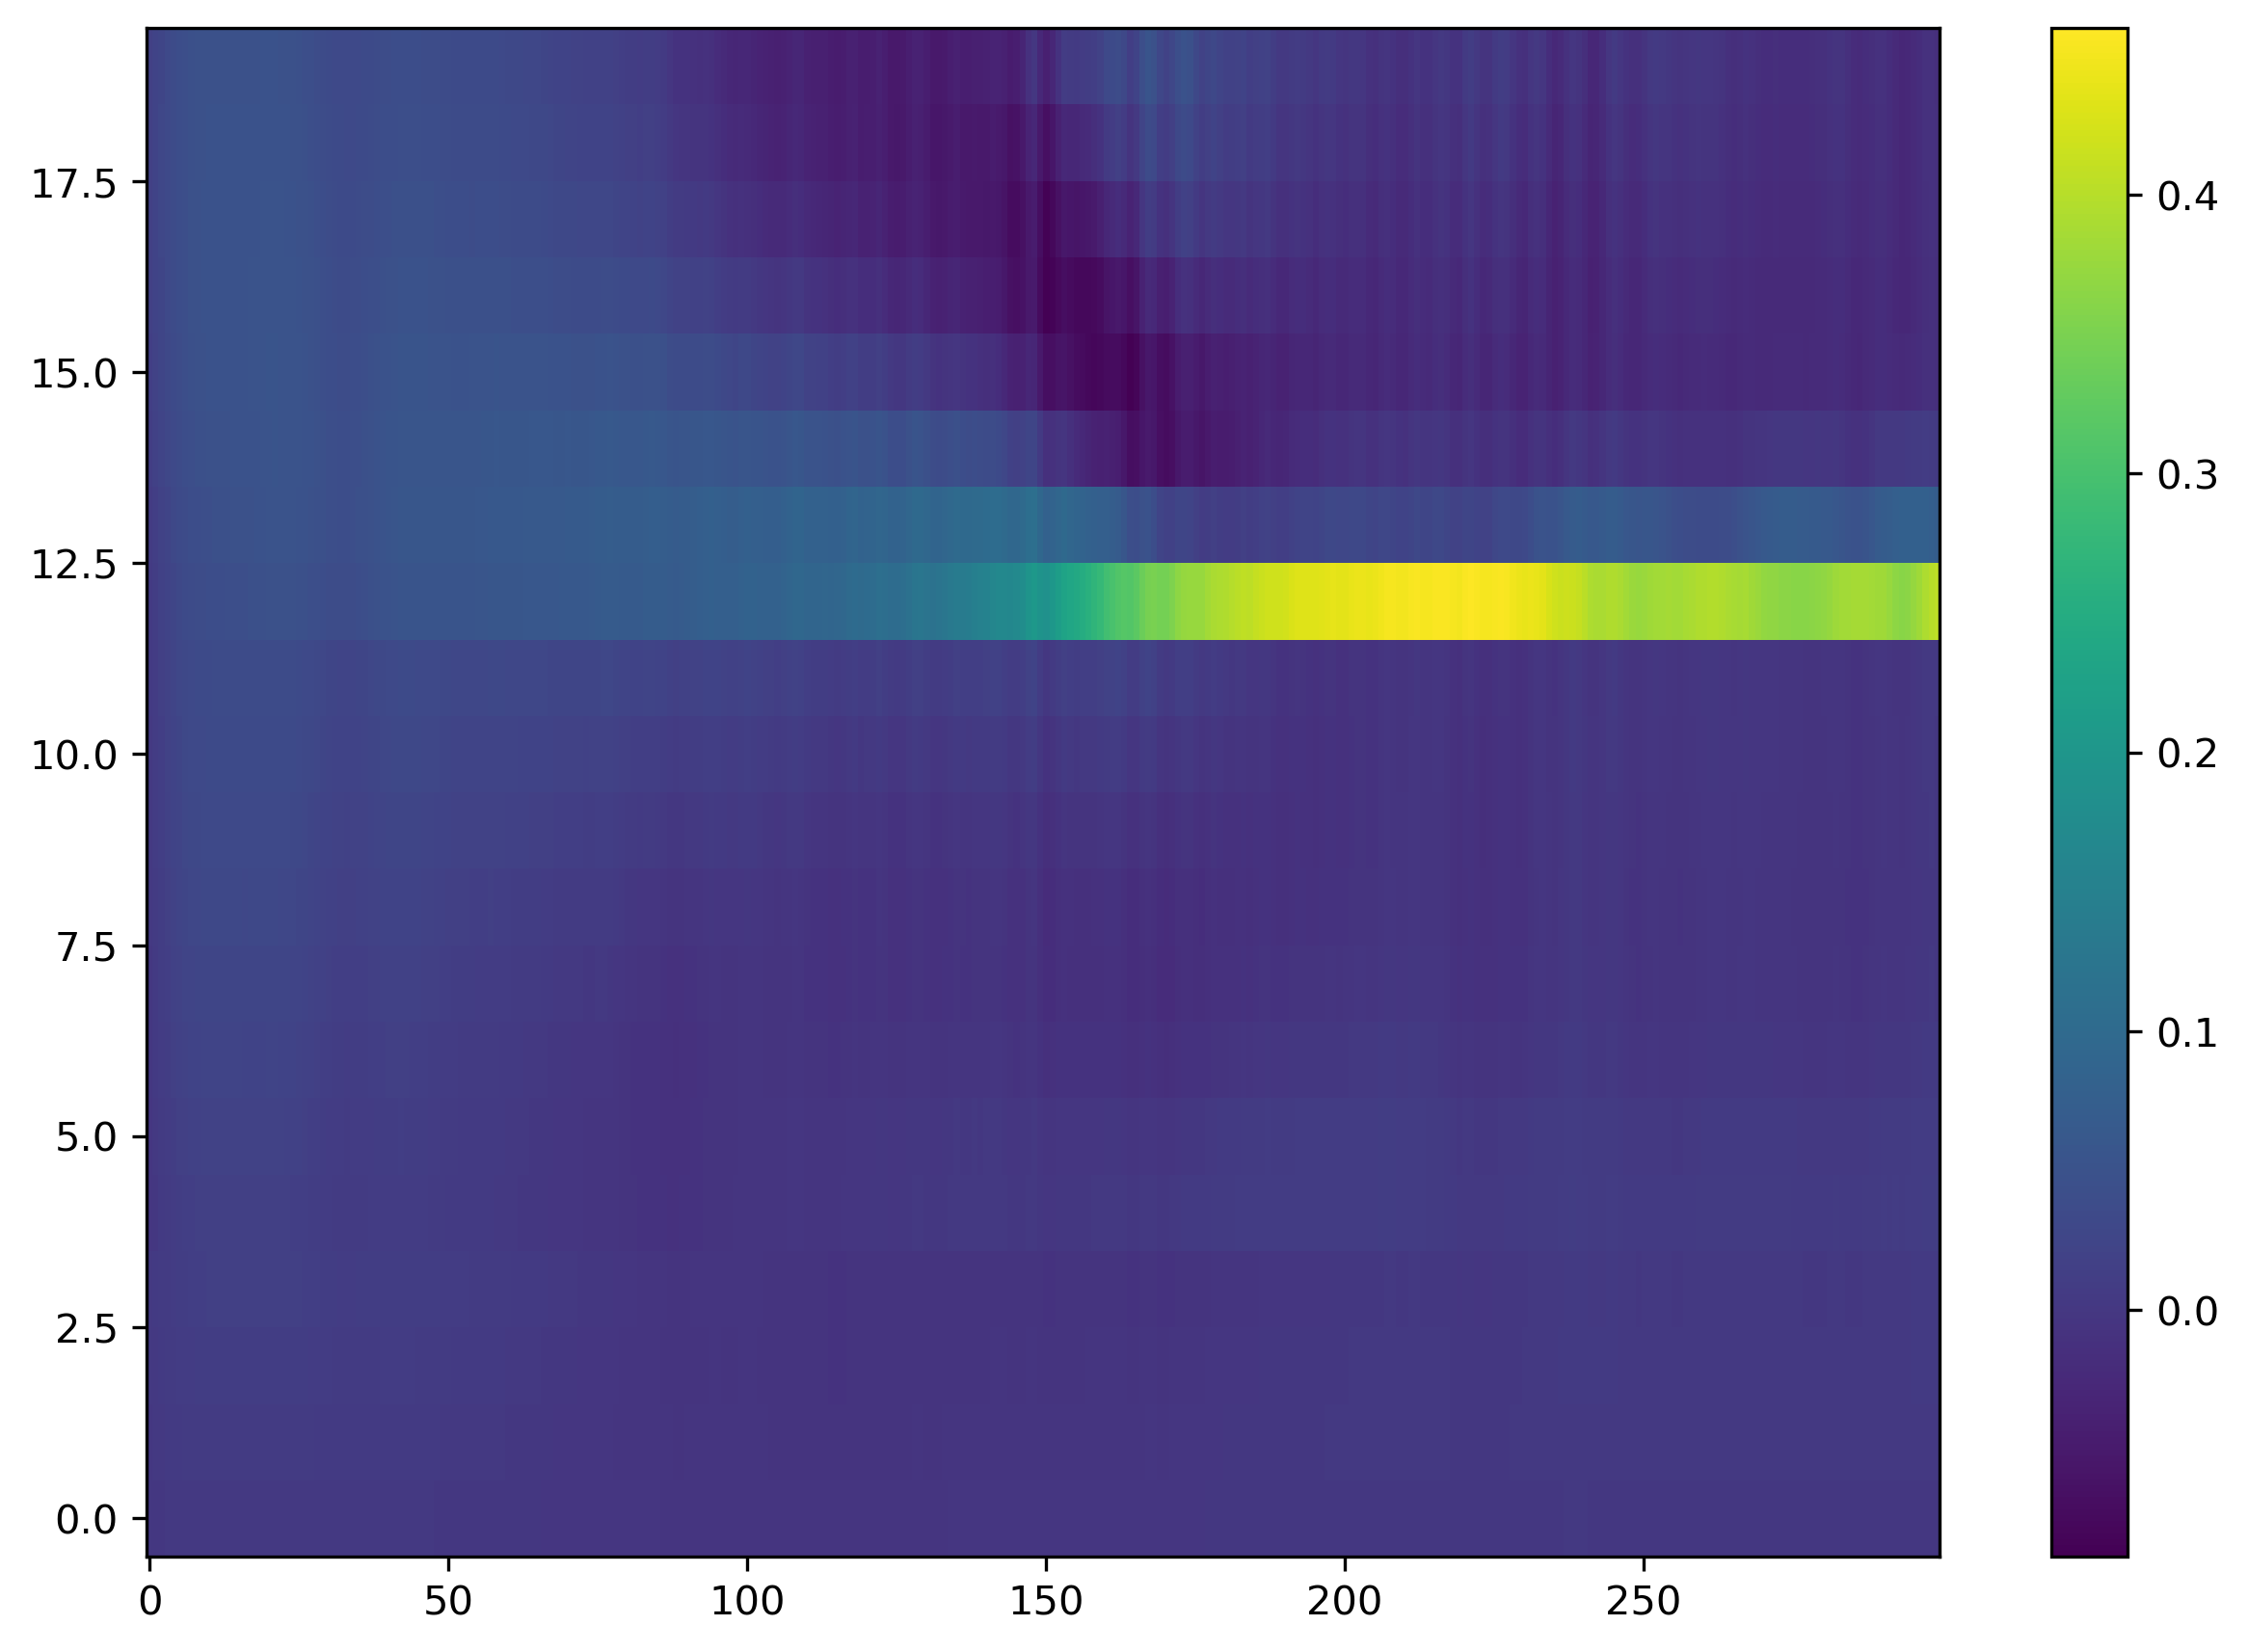

In [11]:
fig=plt.figure(figsize=(10,7))
plt.imshow(test_output,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

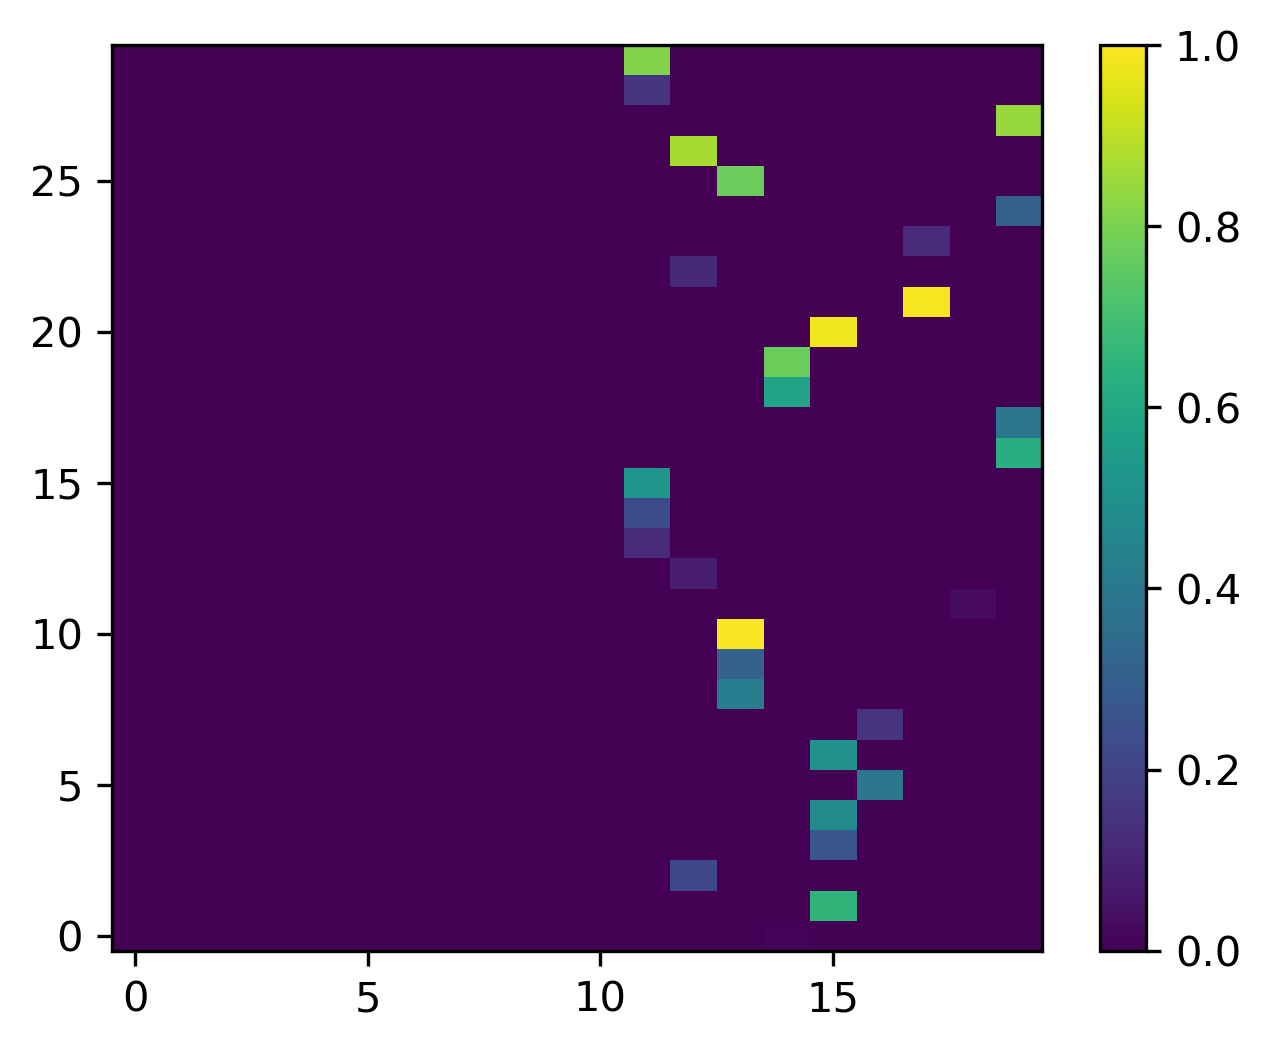

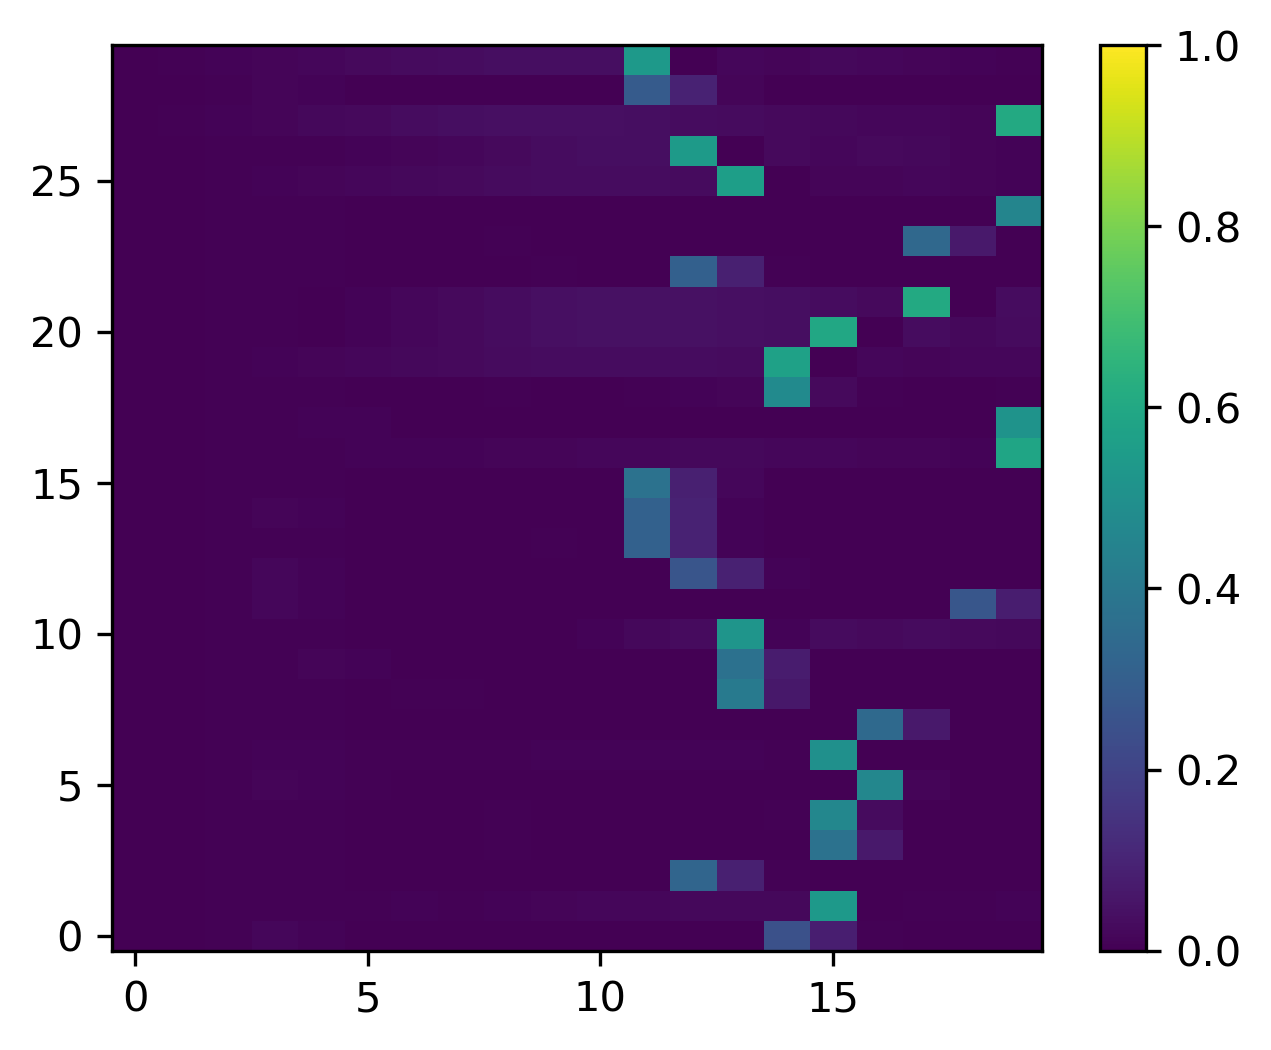

Deviation:  1.5932546658104205


In [12]:
batchsize=30
test_observations,test_target=produce_batch()
test_output=zeros([batchsize,timesteps])

test_output[:,:]=rnn.predict_on_batch(test_observations)[:,:,0]

fig=plt.figure(figsize=(5,4))
plt.imshow(test_target[:,:,0],vmax=1.0,vmin=0.0,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

fig=plt.figure(figsize=(5,4))
plt.imshow(test_output,vmax=1.0,vmin=0.0,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

print("Deviation: ", sum((test_output-test_target[:,:,0])**2))

# Countdown-Net

A net that counts down: At some random time, it is told a number, and then it outputs a 'one' after this number of steps!

In [13]:
def init_count_net():
    global rnn, batchsize, timesteps
    global firstLSTMlayer
    rnn = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    firstLSTMlayer=LSTM(2, batch_input_shape=(None, timesteps, 2), return_sequences=True)
    rnn.add(firstLSTMlayer)
    rnn.add(LSTM(2, return_sequences=True))
    rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [14]:
def produce_batch_counting():
    global batchsize, timesteps
    
    observations=zeros([batchsize,timesteps,2])
    desired_output=zeros([batchsize,timesteps,2])
    
    tell_position=random.randint(int(timesteps/2),size=batchsize)
    count_position=random.randint(int(timesteps/2)-1,size=batchsize)
    expect_position=tell_position+count_position
    
    # mark input-slot 0 with 1 at the tell_position:
    observations[range(batchsize),tell_position,0]=1
    # write the counter value
    observations[range(batchsize),tell_position,1]=count_position
    
    desired_output[range(batchsize),expect_position,0]=1
    return(observations,desired_output)

In [15]:
timesteps=20


init_count_net()


batchsize=1
test_observations,test_target=produce_batch_counting()

batchsize=20
epochs=300

test_output=zeros([timesteps,epochs])

for k in range(epochs):
    input_observations,output_targets=produce_batch_counting()
    rnn.train_on_batch(input_observations,output_targets)
    test_output[:,k]=rnn.predict_on_batch(test_observations)[0,:,0]
    print("epoch: ", k, " deviation: ", "{:1.3f}".format(sum((test_output[:,k]-test_target[0,:,0])**2)), end="    \r")


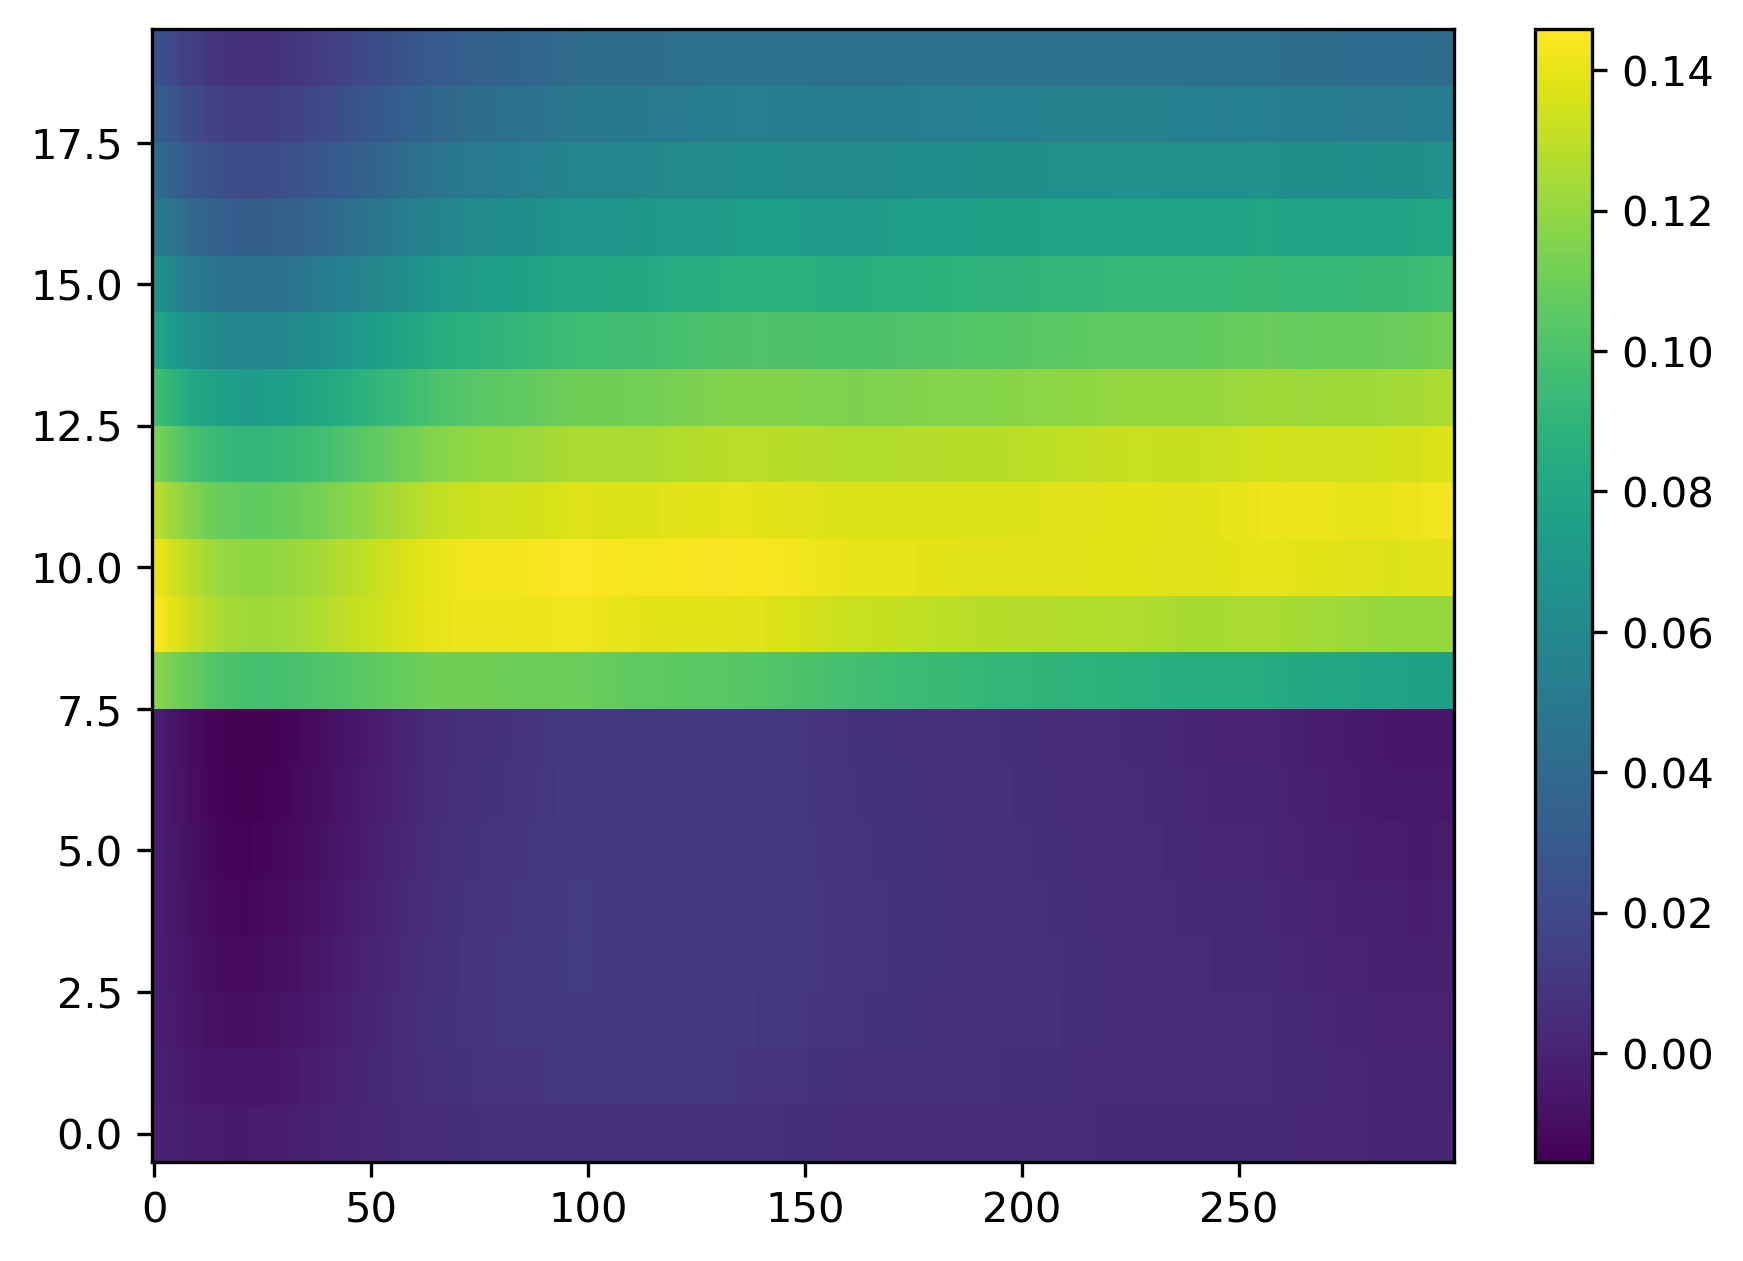

In [16]:
fig=plt.figure(figsize=(7,5))
plt.imshow(test_output,origin='lower',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

Now: try to inspect output of LSTM neurons at intermediate times. This is also a nice example of how to use some smart keras functionality.

In [17]:
from tensorflow.keras import Model

# get a function that represents the mapping from the 
# network inputs to the neuron output values of the first LSTM layer:
neuron_values = Model([rnn.inputs], [firstLSTMlayer.output])

In [18]:
batchsize=1
test_observations,test_target=produce_batch_counting()

In [19]:
print(test_observations)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 7.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]


In [20]:
the_values=neuron_values.predict_on_batch([test_observations])

In [21]:
shape(the_values)

TensorShape([1, 20, 2])

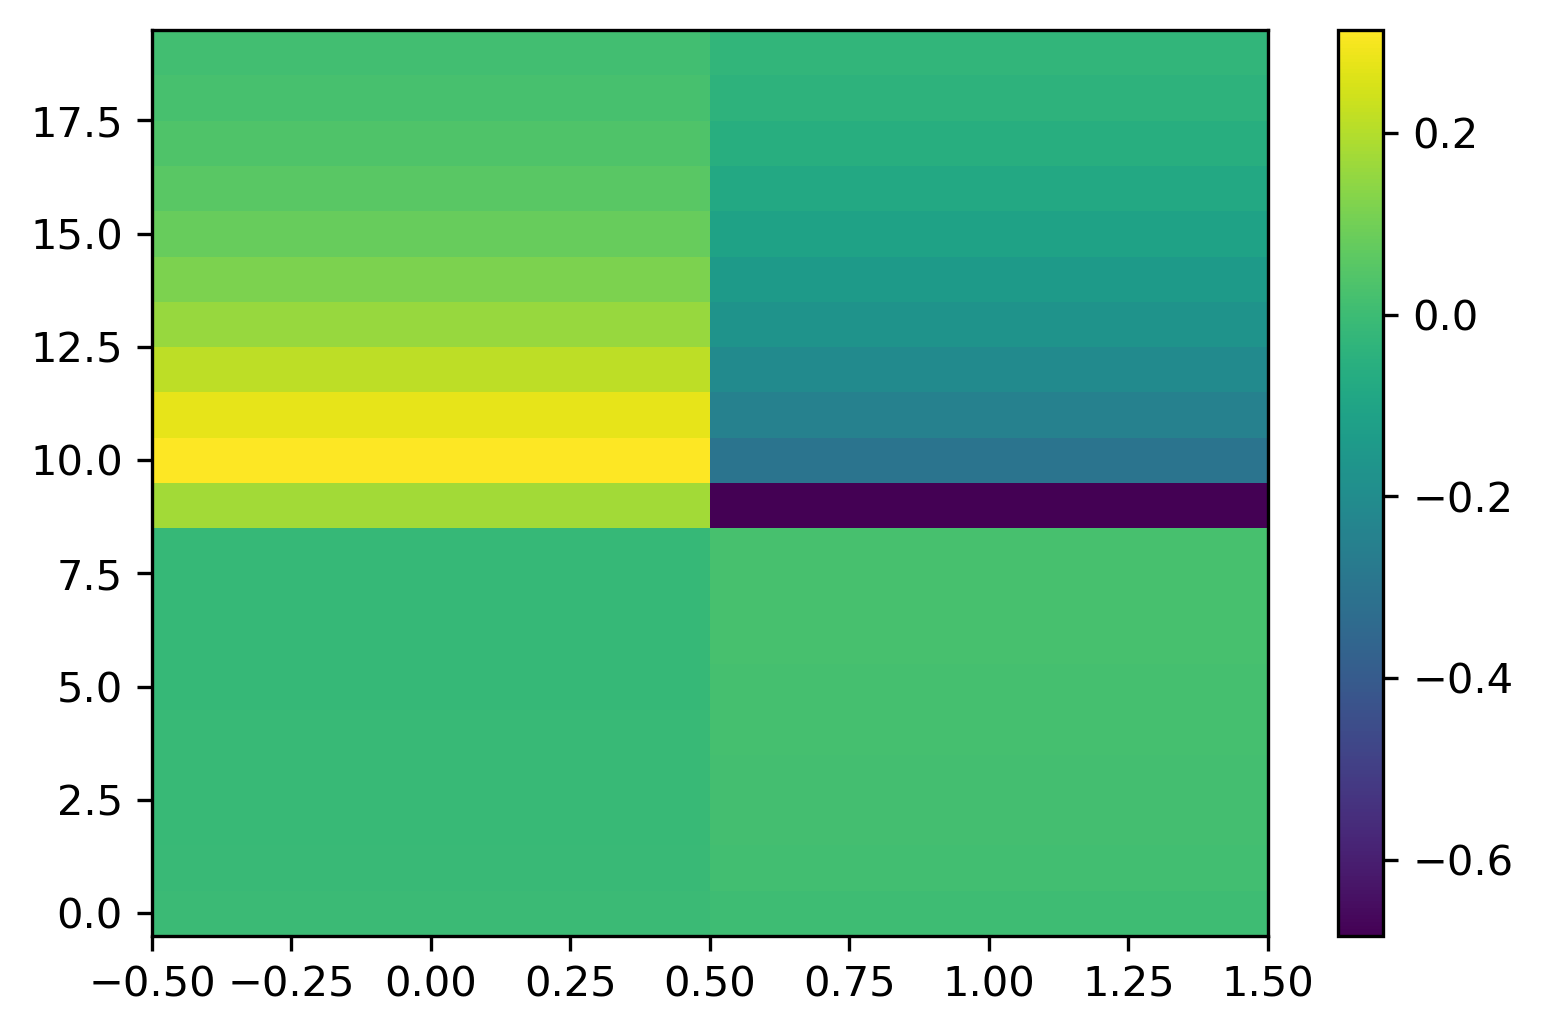

In [22]:
plt.imshow(the_values[0,:,:],interpolation='nearest',origin='lower',aspect='auto')
plt.colorbar()
plt.show()